In [53]:
import numpy as np
import pandas as pd

In [54]:
df = pd.read_csv('hospital_data.csv')
df.head()

,Unnamed: 0,Doctor Name,Specialty,Experience,Locality,City,Clinic Name,Consultation Fee,Rating,Patient Stories,Profile Link
0,0,Dr. Sumanth Shetty,Dentist,26,"Koramangala,",Bangalore,Chisel\n Dental,300,97%,4635.0,https://www.practo.com/bangalore/doctor/dr-sum...
1,1,Dr. Venkatesh M J,Dentist,30,"Indiranagar,",Bangalore,All Care Dental Centre - since 1969,300,90%,51.0,https://www.practo.com/bangalore/doctor/venkat...
2,2,Dr. M J Murali,Dentist,28,"Indiranagar,",Bangalore,All Care Dental Centre - since 1969,300,94%,212.0,https://www.practo.com/bangalore/doctor/dr-m-j...
3,3,Dr. Girish Nelivigi,Urologist,32,"Bellandur,",Bangalore,Nelivigi Multispeciality and Urology Hospital,800,84%,127.0,https://www.practo.com/bangalore/doctor/girish...
4,4,Dr. Lohith U,GastroIntestinal Surgeon,17,"Koramangala 1 Block,",Bangalore,Marvel Multispeciality Hospital,1200,94%,17.0,https://www.practo.com/bangalore/doctor/lohith...


In [55]:
df = df.drop(columns=['Unnamed: 0','Doctor Name','City','Profile Link','Clinic Name'])
df.head()

,Specialty,Experience,Locality,Consultation Fee,Rating,Patient Stories
0,Dentist,26,"Koramangala,",300,97%,4635.0
1,Dentist,30,"Indiranagar,",300,90%,51.0
2,Dentist,28,"Indiranagar,",300,94%,212.0
3,Urologist,32,"Bellandur,",800,84%,127.0
4,GastroIntestinal Surgeon,17,"Koramangala 1 Block,",1200,94%,17.0


In [56]:
df['Rating'] = df['Rating'].replace('%', '', regex=True).astype(float)

In [57]:
df.isnull().sum()

Specialty           0
Experience          0
Locality            0
Consultation Fee    0
Rating              5
Patient Stories     5
dtype: int64

In [58]:
from sklearn.impute import SimpleImputer

In [59]:
si = SimpleImputer()
df['Rating'] = si.fit_transform(df[['Rating']])
df['Patient Stories'] = si.fit_transform(df[['Patient Stories']])
df.isnull().sum()

Specialty           0
Experience          0
Locality            0
Consultation Fee    0
Rating              0
Patient Stories     0
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Specialty'] = le.fit_transform(df['Specialty'])
df['Locality'] = le.fit_transform(df['Locality'])
df.head()

,Specialty,Experience,Locality,Consultation Fee,Rating,Patient Stories
0,0,26,26,300,97.0,4635.0
1,0,30,14,300,90.0,51.0
2,0,28,14,300,94.0,212.0
3,18,32,6,800,84.0,127.0
4,3,17,23,1200,94.0,17.0


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

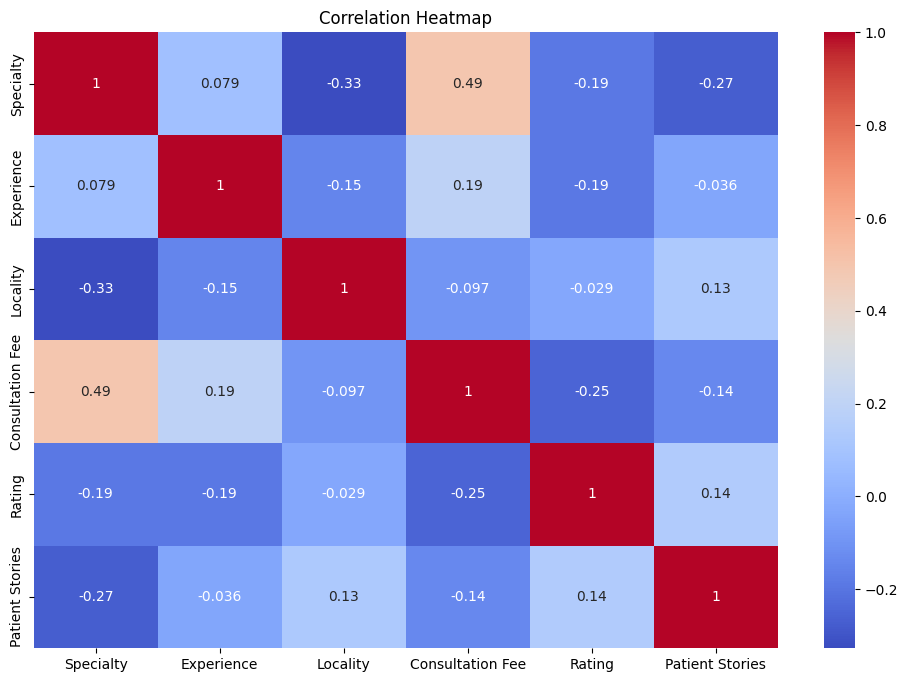

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

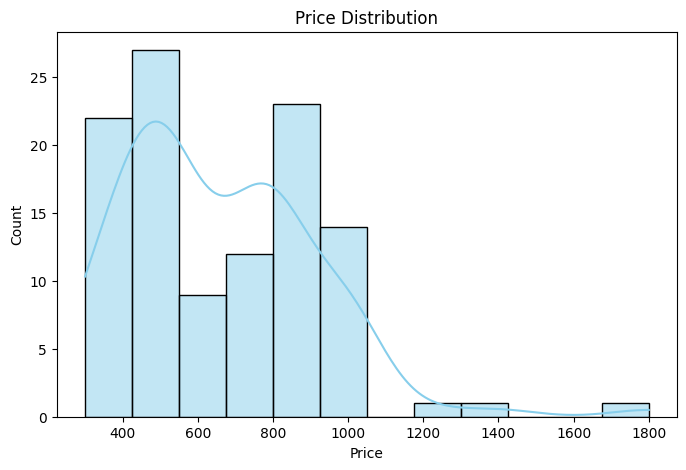

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(df['Consultation Fee'], kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [64]:
x = df.drop(columns = 'Consultation Fee')
y = df['Consultation Fee']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [67]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

model_performance = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = r2

print(model_performance)

{'Linear Regression': 0.1862072831958328, 'Decision Tree': 0.15325877362128815, 'Random Forest': 0.2752302352487467}


In [68]:
best_model = max(model_performance, key=lambda x: model_performance[x])
print(f"The best model is: {best_model} with R^2 score of {model_performance[best_model]}")

The best model is: Random Forest with R^2 score of 0.2752302352487467


In [69]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor()

In [70]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

In [71]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

In [72]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [73]:
best_tuned_model = grid_search.best_estimator_

In [74]:
y_pred = best_tuned_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"Best Tuned Model R^2 Score: {r2}")

Best Tuned Model R^2 Score: 0.23631273836097944


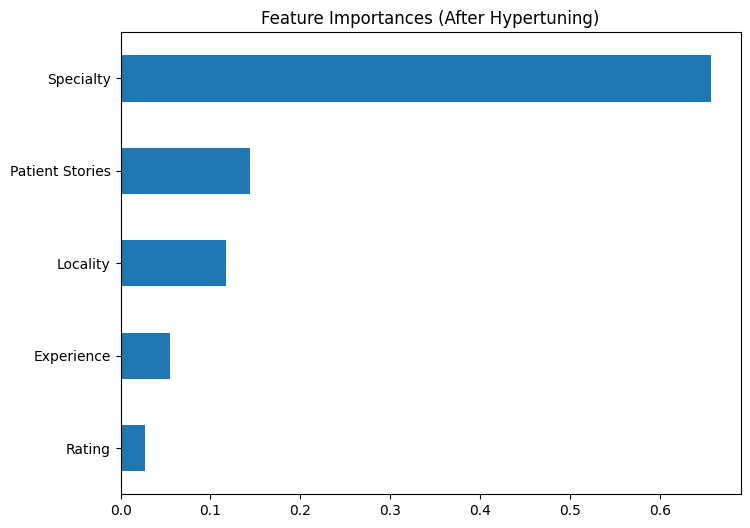

In [75]:
feature_importances = pd.Series(best_tuned_model.feature_importances_, index=x.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (After Hypertuning)')
plt.show()